# `geopandas`

GeoPandas is a Python library that extends the `pandas` library by adding support for geospatial data. In this lesson we will introduce the `geopandas` library to work with vector data. We will also make our first map.

## About the data

Wild pigs (Sus scrofa) are a destructive invasive species in California, causing significant environmental and agricultural damage. Introduced to the region in the 1700s, they have since spread across the state, impacting native ecosystems through habitat destruction, soil disturbance due to their rooting behavior, and competition with native wildlife for food [1]. This widespread damage has made managing wild pig populations a critical issue for conservation and agricultural communities in California.

In this lesson we will use simplified point data about wild pig sightings in California from the Global Biodiversity Information Facility (GBIF). GBIF is an international network and data platform that provides open access to biodiversity data from around the world. By aggregating data from multiple sources, including museums, research institutions, and citizen science initiatives, GBIF enables scientists, policymakers, and the public to explore and analyze species distribution and environmental trends.

The data we will use today has been simplified from the complete Sus scrofa occurrencies data [2] accessed through the GBIF website.

## Reproducible file paths

In this lesson we will introduce three Python packages:

- `geopandas` [3]: a package that extends pandas to work with geospatial data. This is the main package we will be working with in the next few lessons.
- `os`: a package that provides functions for interacting with the operating system, allowing us to perform tasks like file manipulation in a platform-independent way.
- `matplotlib` [4]: one of the most popular and widely used Python libraries for data visualization.

Let’s start by importing these packages:

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

To import our data we will first use the os package to create a reproducible file path:

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

Using the `os.path.join()` function allows us to create file paths that work on any operating system. Each operating system uses a different way to separate folders in a path (e.g., Windows uses backslashes `\`, while macOS and Linux use forward slashes `/`). By using `os.path.join()`, Python automatically handles the correct separator for the operating system you’re working on. This avoids errors and makes your code more portable.

We can then use this file path to read in a shapefile with `geopandas` by using the `geopandas.read_file()` function:

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/share/proj failed


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


#### One shapefile = multiple files

Although the parameter for `geopandas.read_file()` is only the file with `.shp` extension, remember that we need to have at least the `.shx` and `.dbf` files in the same directory as the `.shp` to read in the data.

#### Check-in

Create a file path using `os.path.join()` to import the shapefile of the California state boundary as a `geopandas.GeoDataFrame`. Once imported, take a look at the data.

In [5]:
fp2 = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca = gpd.read_file(fp2)
ca.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `GeoSeries` and `GeoDataFrame`

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`. We can think of it as a `pandas.DataFrame` with a dedicated geometry column that can perform spatial operations.

The **geometry column** in a `geopandas.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. This geometry column is of type `geopandas.GeoSeries`. Columns in the `geopandas.GeoDataFrame` with attributes about the features are `pandas.Series` like in a regular `pandas.DataFrame`.

#### Example

First, notice that the leftmost column of the `pigs` geo-dataframe is a column named `geometry` whose values indicate points:

In [6]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


As usual, we can check the type of our objects using the `type` Python function:

In [7]:
# Check the data type of the pigs dataframe
print(type(pigs))

# Check the data type of the geometry column
print(type(pigs.geometry))

# Check the data type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each column:

In [8]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the `geom_type` attribute of a `geopandas.GeoDataFrame`:

In [9]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

#### Check-in

What is the geometry type of the single feature in the California state boundary? Why does it make sense to have this kidn of geometry?

In [10]:
ca.geom_type

0    MultiPolygon
dtype: object

## CRS(coordinate reference system) and extent

Two other important attributes of a `geopandas.GeoDataFrame` are its coordinate reference system (CRS) and its extent.

We can think of the **coordinate reference system (CRS)** as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a `geopandas.GeoDataFrame` using the `crs` attribute:

In [11]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the bounding box covering *all* the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.

We access the extent of a `geopandas.GeoDataFrame` using the `total_bounds` attribute:

In [12]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [14]:
# Get more information about the CRS
print('ellipsoid:', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid: WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


#### Check-in
 
1. What are the ellipsoid and datum? What are they telling us about the CRS?

Where your data is being referenced back to.

2. What does it mean that the CRS is geographic and not projected?

Geographic is still looking at the whole earth as one (3D). Projected means looking at the earth as a flat object or map (2D).

3. Print the CRS, and extent of the California boundary.

In [18]:
print('CRS:', ca.crs)
print('Extent: ', ca.total_bounds)
print('Does the CRS of both GeoDataFrames match?', pigs.crs == ca.crs)

CRS: epsg:4326
Extent:  [-124.48201686   32.52883674 -114.13122248   42.00950827]
Does the CRS of both GeoDataFrames match? True


## Data wrangling

GeoPandas is conveniently built on top of `pandas`, so we may use everything we have learned about data selection, wrangling, and modification for a `pandas.DataFrame` to wrangle `geopandas.GeoDataFrames`.

#### Example

We only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [19]:
# Examine pig observation by year
pigs['year'].value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection to get data from 2020 onwards:

In [20]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check length of original dataframe
print('Total number of observations: ', len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ', len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


## Create a map

### `plot()`

Similarly to a `pandas.DataFrame`, a `geopandas.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `geopandas.GeoDataFrame` will be used to create the axes of the plot.

#### Example

Let us take a quick look at our recent pigs data:

<AxesSubplot:>

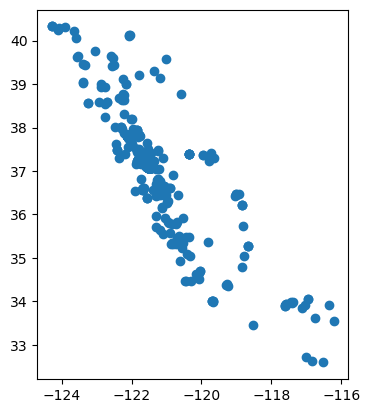

In [21]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`

Going forward, we will make more complex visualizations where we add different layers to a graph and customize it. To do this, we will use the `matplotlib` Python library for creating visualizations. We can interact with `matplotlib` via its `pyplot` interface, which we imported at the top of the notebook.

Matplotlib graphs the data in a **figure** which can have one or more **axes**. The axes is only the area specified by the x axis and y axis and what is plotted in it, while the figure can include multiple axes in it.

To create a new blank figure:

1. Initialize a new figure and axes by calling `pyplot`’s `subplots()` function, and
2. show the graph using `plt.show()`:

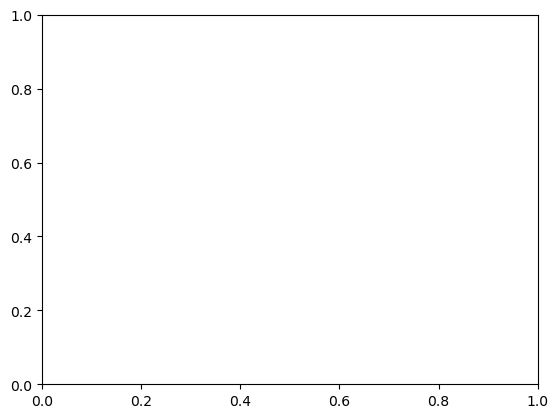

In [23]:
# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display figure
plt.show()

Notice that `plt.subplots()` is a function that returns two objects, when we call it, get a figure `fig` with a single empty axis `ax`. We can think of this step as setting a new blank canvas on which we will paint upon.

## Adding a layer

When using `matplotlib`, it can be useful to think of creating a plot as adding layers to an axis. The general syntax to plot a datafram `df` onto an axis is:

```python
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Plot a df on the ax axis
df.plot(ax=ax,  # Add plot to axis
        ...)    # Other arguments for plot function

# Display figure
plt.show()
```

#### Example

The first layer that we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

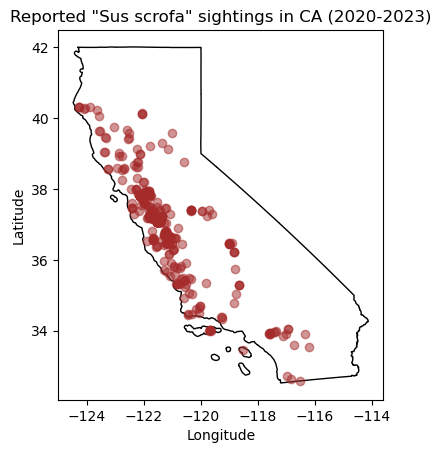

In [31]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Add CA boundary
ca.plot(ax=ax,
                color = 'none',
                edgecolor = 'black')

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax,
                alpha = 0.5,
                color = 'brown')  

# Customization
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

## Customization

Matplotlib allows for a lot of customization. Some of it can be done directly in the `plot()` method for the dataframe (like we’ve done when ploting data using `pandas`), while other is done by updating attributes of the axis `ax`.